# Welcome to <"Hello, world!" of Deep Learning Session>
### In this session we will get a brief idea on Neural Networks and how to apply them to the MNIST dataset 


# Section 1: Function approximation
## let's see how to approximate a function using a simple line 
## Let's first plot a sine function 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense

In [3]:
x = tf.linspace(-np.pi,np.pi,2000)

In [4]:
y= tf.math.sin(x)

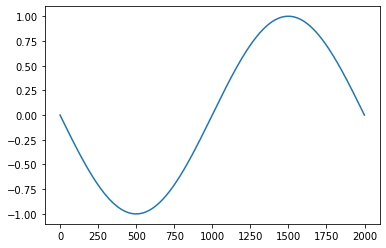

In [5]:
plt.plot(y)

In [6]:
x.shape

TensorShape([2000])

## To get a simple line approxiamtion using Keras, we use a single layer with one neuron and no activation function 


In [16]:
model = Sequential()

In [17]:
model.add(Dense(1,input_dim=1))

In [18]:
model.compile(optimizer = 'adam',loss='mean_squared_error')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x,y,epochs = 150)

Epoch 1/150
63/63 [==============================] - 1s 2ms/step - loss: 0.9169
Epoch 2/150
63/63 [==============================] - 0s 2ms/step - loss: 0.7245
Epoch 3/150
63/63 [==============================] - 0s 2ms/step - loss: 0.5975
Epoch 4/150
63/63 [==============================] - 0s 2ms/step - loss: 0.4855
Epoch 5/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3963
Epoch 6/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3365
Epoch 7/150
63/63 [==============================] - 0s 2ms/step - loss: 0.2930
Epoch 8/150
63/63 [==============================] - 0s 2ms/step - loss: 0.2572
Epoch 9/150
63/63 [==============================] - 0s 2ms/step - loss: 0.2406
Epoch 10/150
63/63 [==============================] - 0s 2ms/step - loss: 0.2179
Epoch 11/150
63/63 [==============================] - 0s 2ms/step - loss: 0.2116
Epoch 12/150
63/63 [==============================] - 0s 2ms/step - loss: 0.2044
Epoch 13/150
63/63 [=================

In [21]:
y_dash = model.predict(x)

In [22]:
y_dash[0]

array([-0.9477769], dtype=float32)

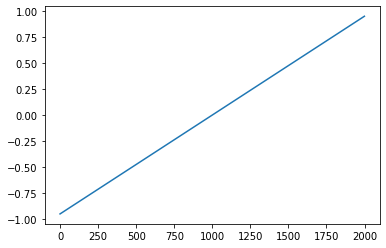

In [23]:
plt.plot(y_dash)

### As you can see, the output straight line is not a good approximation to the sine function, 
### we need to add non-linearity to this approximation, we do that by using an activation 
### function such as ReLU activation function

In [37]:
model = Sequential()

In [38]:
model.add(Dense(16,input_dim=1,activation='relu')) # Let's use more neurons, each neuron represents WX + b
model.add(Dense(1)) # We need to add another single layer with one neuron to get only a single number as an output

In [39]:
model.compile('adam','mean_squared_error')

In [40]:
model.fit(x,y,epochs=50)

Epoch 1/50
63/63 [==============================] - 1s 1ms/step - loss: 0.4200
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2362
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1938
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1802
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1651
Epoch 6/50
63/63 [==============================] - 0s 1ms/step - loss: 0.1531
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 8/50
63/63 [==============================] - 0s 1ms/step - loss: 0.1184
Epoch 9/50
63/63 [==============================] - 0s 1ms/step - loss: 0.1085
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0891
Epoch 11/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 12/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0726
Epoch 13/50
63/63 [==============================

In [43]:
y_bar = model.predict(x) 

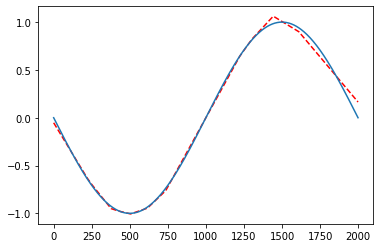

In [44]:
plt.plot(y_bar,'--r')
plt.plot(y)

### See how the approximation (in red) is  much better, you can get an even better one by increasing the 16 neurons in the first layer 

# Section 2: MNIST dataset

In [75]:
from tensorflow.keras.datasets import mnist

In [76]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [80]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


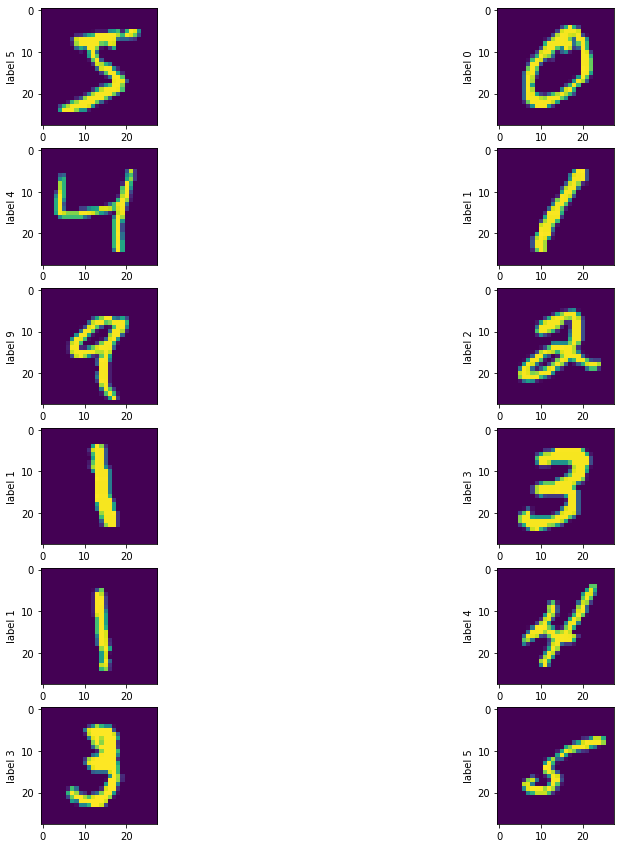

In [121]:
plt.figure(figsize=(15,15))
for i in range(12):
    ax = plt.subplot(6,2,i+1)
    plt.imshow(x_train[i])
    ax.set_ylabel('label ' + str(y_train[i]) )

In [122]:
x_train = x_train/255.0
x_test = x_test/255.0

In [123]:
from tensorflow.keras.utils import to_categorical # We need to convert the labels to one hot encoded vectors
                                                  # [4] --> [0,0,0,1,0,0,0,0,0,0]

In [124]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [125]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


In [129]:
type(x_train)

numpy.ndarray

In [143]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)  # Flatten the input data 

In [144]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)


x_train shape: (60000, 784)
y_train shape: (60000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)


In [45]:
model = Sequential([
    Dense(512,input_shape=(784,),activation = 'relu',name='fc1'),
    Dense(1024,activation = 'relu',name='fc2'),
    Dense(10,activation = 'softmax',name='final')]    # Output layer must have number of neurons same as number of classes 
                  )                                   # and a Softmax activation function 

In [146]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 512)               401920    
_________________________________________________________________
fc2 (Dense)                  (None, 1024)              525312    
_________________________________________________________________
final (Dense)                (None, 10)                10250     
Total params: 937,482
Trainable params: 937,482
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=12)

In [151]:
predictions = np.argmax(model.predict(x_train[:15]),axis=1)

In [152]:
predictions

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=int64)

In [155]:
np.argmax(y_train[:15],axis=1)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=int64)

## You can get better results with less computation using Convolutional Neural Networks

In [157]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten

In [189]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',strides=(1,1),padding='same',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,'softmax')
])

In [190]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                25930     
Total params: 26,250
Trainable params: 26,250
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [165]:
x_train= x_train.reshape(-1,28,28,1) # For Conv Nets, we don't need to flatten the data before the network
x_test= x_test.reshape(-1,28,28,1) # as it's done inside the network acter Convolution layers

In [167]:
x_train.shape

(60000, 28, 28, 1)

In [192]:
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5103 - accuracy: 0.8526
Epoch 2/2
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1034 - accuracy: 0.9697


In [197]:
preds = np.argmax(model.predict(x_train[:15]),axis=1)

In [198]:
preds

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=int64)